In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data=pd.concat([train,test])
data.to_csv('data.csv')

In [166]:
train.shape

(1460, 81)

In [167]:
test.shape

(1459, 80)

In [78]:
data.shape

(2919, 81)

In [168]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Handling missing values

In [170]:
missing=data.isnull().sum()/data.shape[0]*100
missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [171]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [172]:
data['Alley'].fillna("no Alley access",inplace=True)

In [173]:
data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [174]:
data['PoolQC'].fillna('No pool',inplace=True)

In [175]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [176]:
data['Fence'].fillna('No fence',inplace=True)

In [177]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [178]:
data['MiscFeature'].fillna('None',inplace=True)

In [179]:
num_feature=data.select_dtypes(exclude=['object'])
cat_feature=data.select_dtypes(include=['object'])

In [180]:
num_cols=num_feature.columns
cat_cols=cat_feature.columns

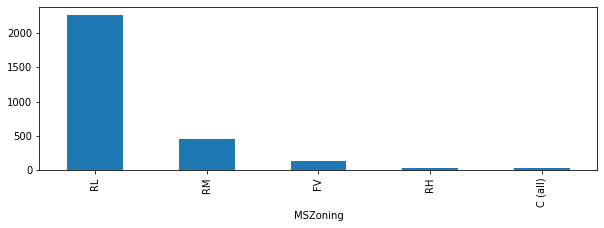

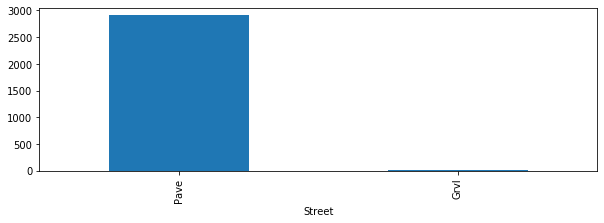

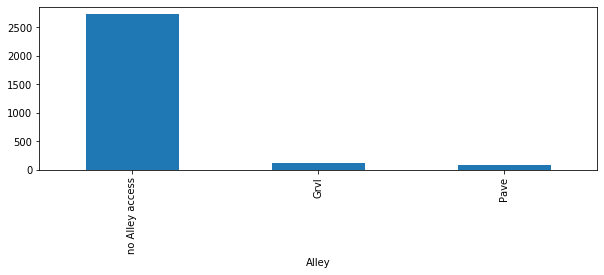

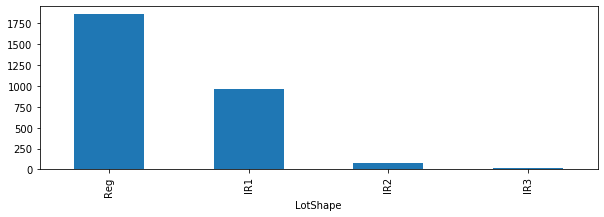

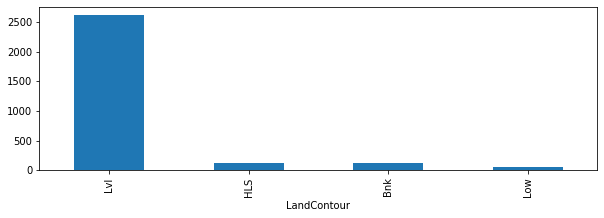

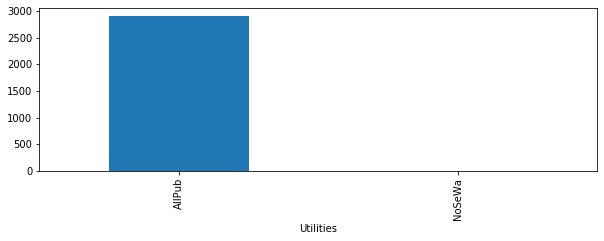

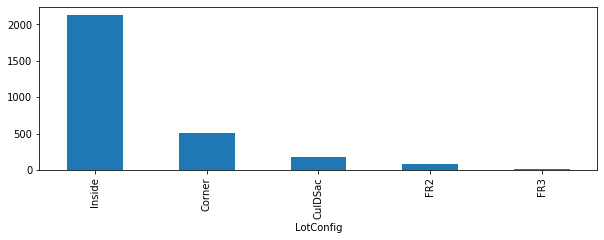

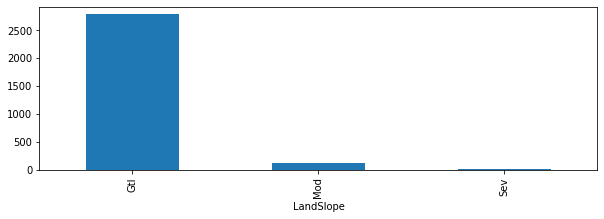

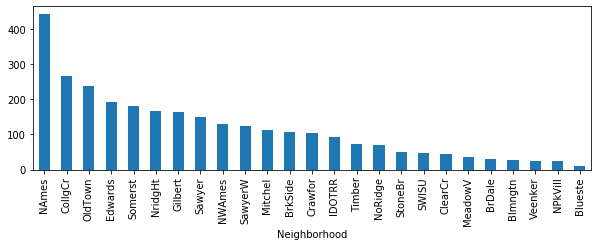

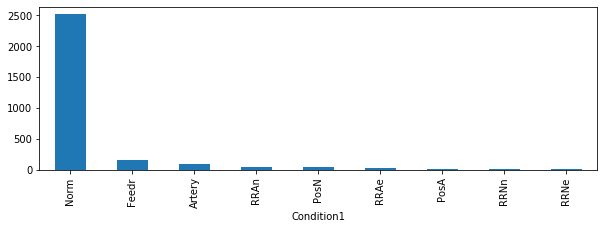

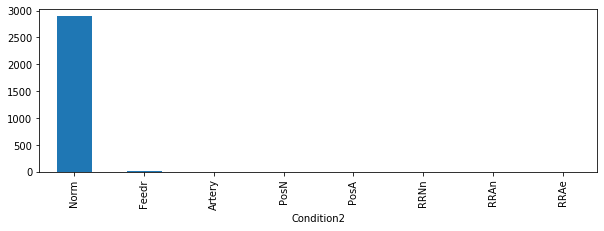

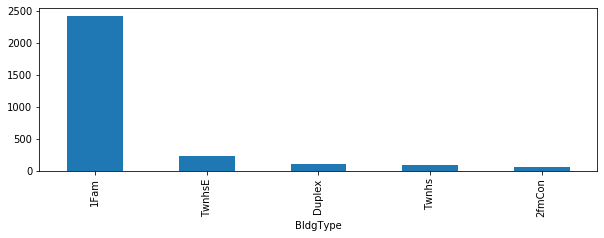

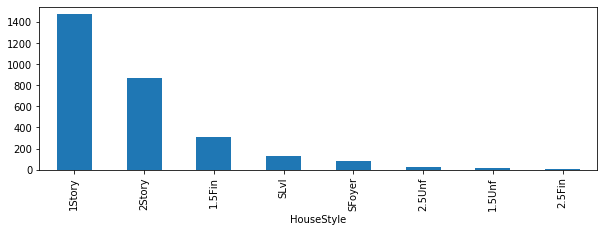

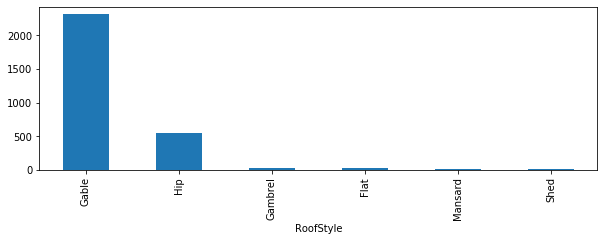

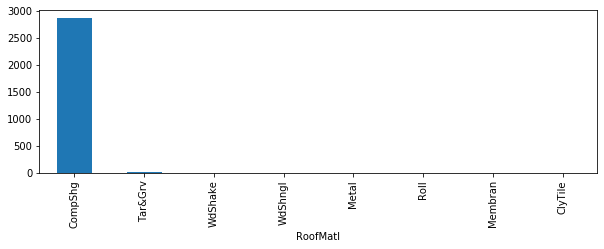

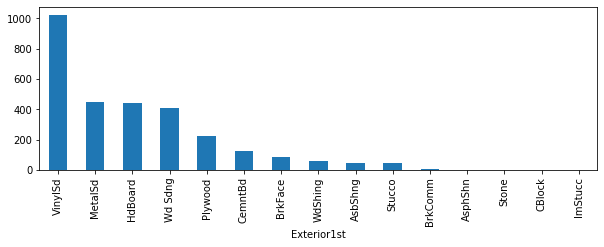

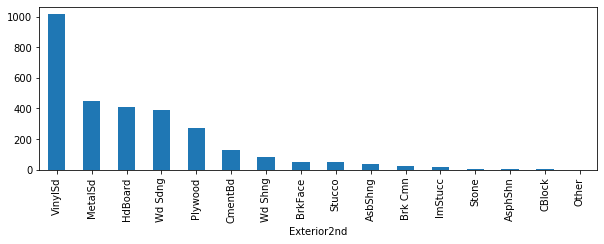

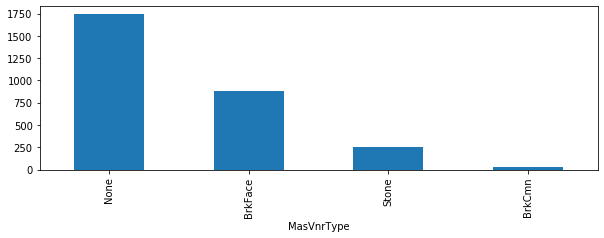

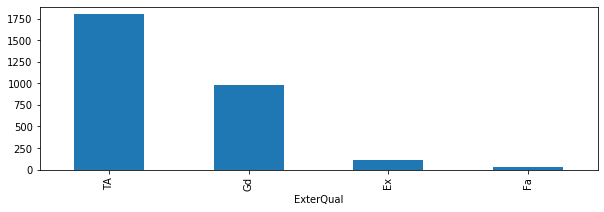

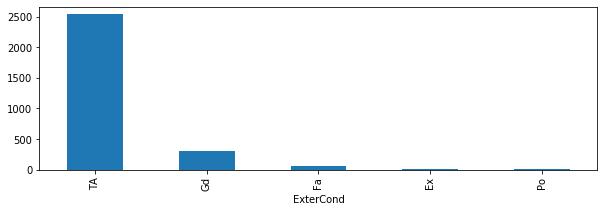

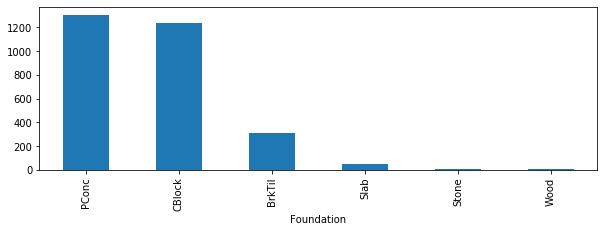

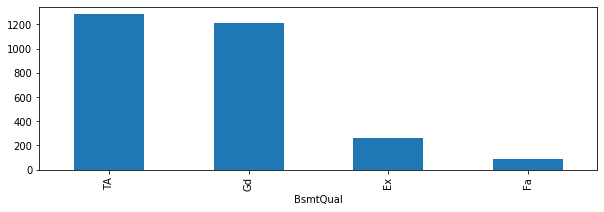

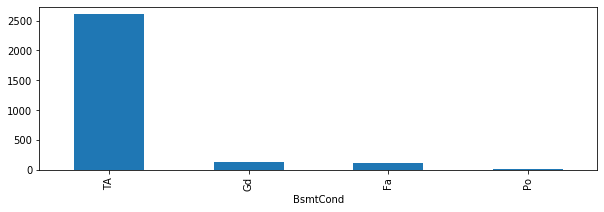

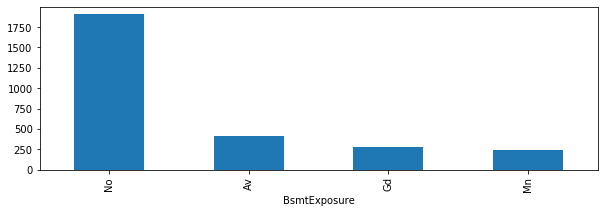

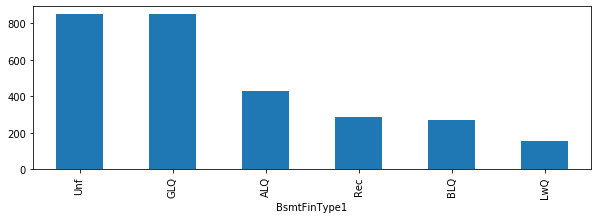

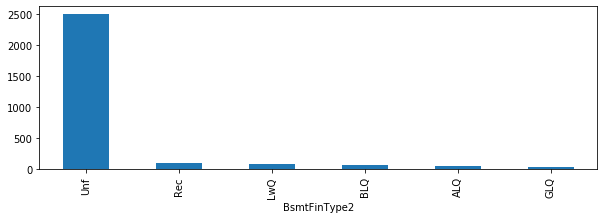

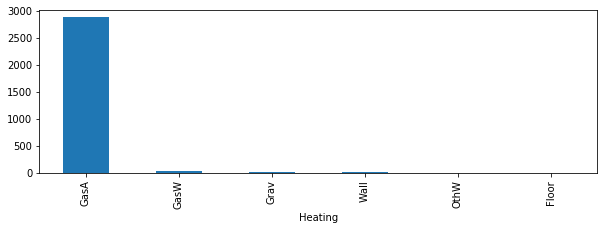

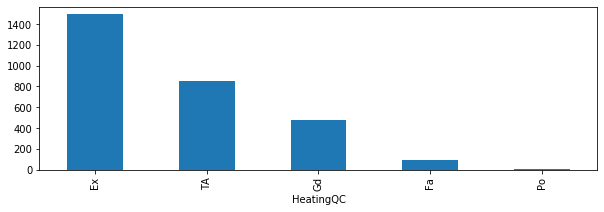

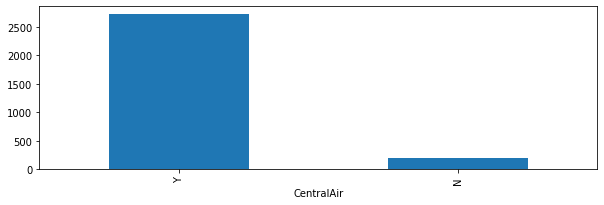

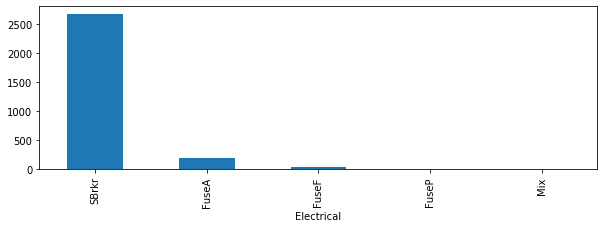

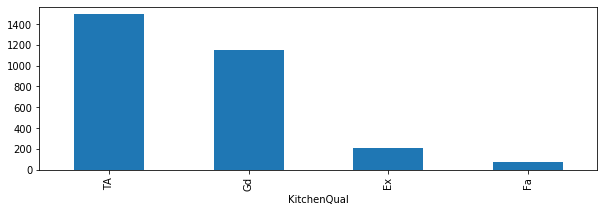

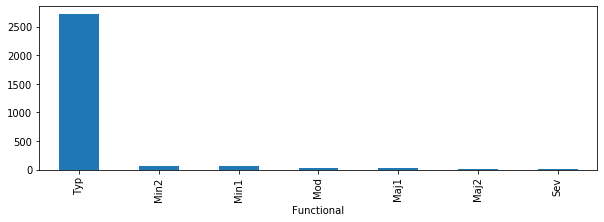

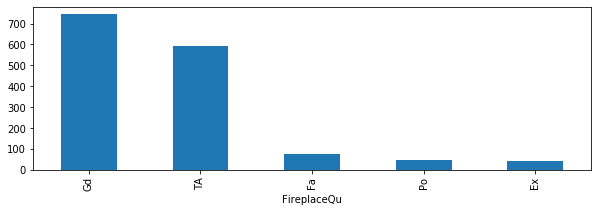

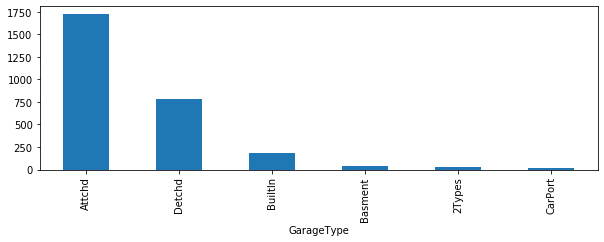

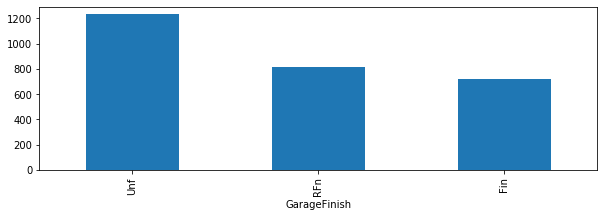

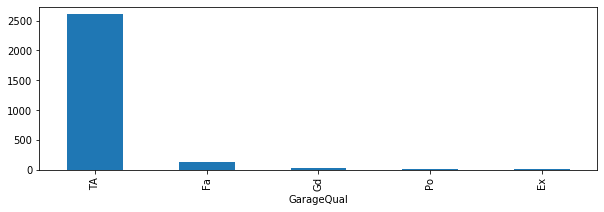

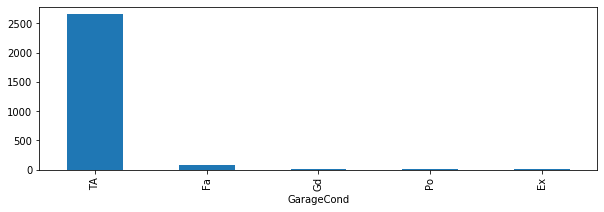

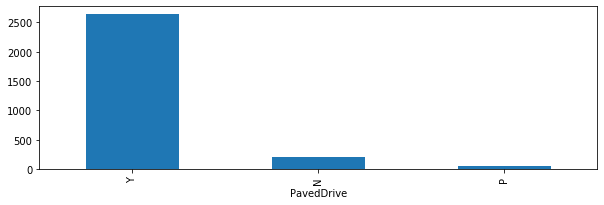

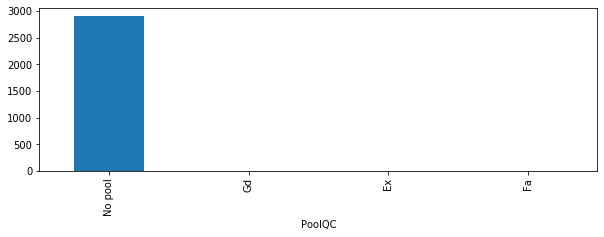

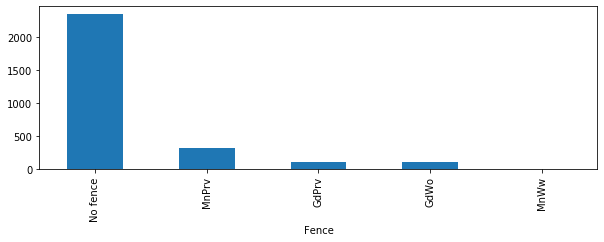

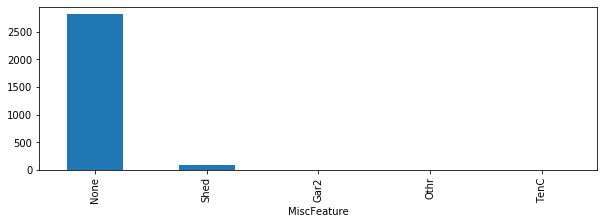

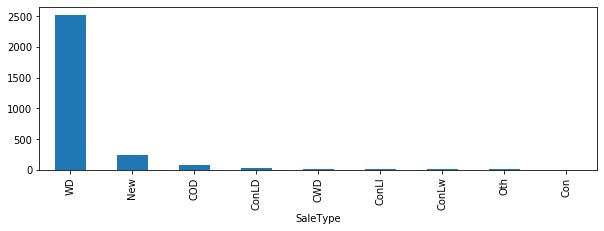

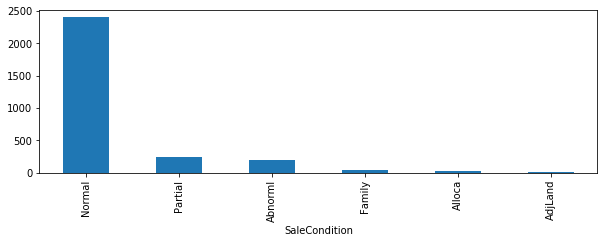

In [92]:
for var in cat_cols:
    cat_feature[var].value_counts().plot(kind='bar',figsize=[10,3])
    plt.xlabel(var)
    plt.show()
    cat_feature[var].value_counts() 

In [181]:
# Finding quassi constant (nearly) features from data set. As they don't give much information
constant_feature=['Street','Utilities','RoofMatl','Heating','Condition2','PoolQC']
data.drop(columns=constant_feature,inplace=True)

In [182]:
num_feature=data.select_dtypes(exclude=['object'])
cat_feature=data.select_dtypes(include=['object'])
num_cols=num_feature.columns
cat_cols=cat_feature.columns

# Handling of Ordinal Categorical feature

In [183]:
map_features=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure'
              ,'BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir'
              ,'KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond'
             ,'Fence']
map_fn={'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'NA':0,'No':1,
        'Mn':2,'Av':3,'Gd':4, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4
        ,'ALQ':5, 'GLQ':6,'Y':1,'N':0,'RFn':2,'Fin':3,'MnWw':1,'GdWo':2,
       'MnPrv':3,'GdPrv':4}

In [184]:
for var in map_features:
    data[var]=data[var].map(map_fn)

In [185]:
data[map_features].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,Fence
0,4,3,4.0,3.0,1.0,6.0,1.0,5,1,4.0,NaN,2.0,3.0,3.0,NaN
1,3,3,4.0,3.0,4.0,5.0,1.0,5,1,3.0,3.0,2.0,3.0,3.0,NaN
2,4,3,4.0,3.0,2.0,6.0,1.0,5,1,4.0,3.0,2.0,3.0,3.0,NaN
3,3,3,3.0,4.0,1.0,5.0,1.0,4,1,4.0,4.0,1.0,3.0,3.0,NaN
4,4,3,4.0,3.0,3.0,6.0,1.0,5,1,4.0,3.0,2.0,3.0,3.0,NaN


In [186]:
missing_map_features=data[map_features].isnull().sum()/data[map_features].shape[0]*100
missing_map_features

ExterQual        0.000000
ExterCond        0.000000
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
HeatingQC        0.000000
CentralAir       0.000000
KitchenQual      0.034258
FireplaceQu     48.646797
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
Fence           80.438506
dtype: float64

In [187]:
# actual missing features :KitchenQual (as here NA means data is missing)
data['KitchenQual'].fillna(data['KitchenQual'].mode()[0],inplace=True)

In [188]:
data[missing_map_features.index].dtypes

ExterQual         int64
ExterCond         int64
BsmtQual        float64
BsmtCond        float64
BsmtExposure    float64
BsmtFinType1    float64
BsmtFinType2    float64
HeatingQC         int64
CentralAir        int64
KitchenQual     float64
FireplaceQu     float64
GarageFinish    float64
GarageQual      float64
GarageCond      float64
Fence           float64
dtype: object

In [189]:
inttype_missing=data[missing_map_features.index].select_dtypes(include=['int64'])
floattype_missing=data[missing_map_features.index].select_dtypes(include=['float64'])

In [190]:
for var in inttype_missing:
    data[var].fillna(0,inplace=True) # as NA means 0 here
for var in floattype_missing:
    data[var].fillna(0.0,inplace=True)

In [191]:
missing_map_features=data[map_features].isnull().sum()/data[map_features].shape[0]*100
missing_map_features

ExterQual       0.0
ExterCond       0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
HeatingQC       0.0
CentralAir      0.0
KitchenQual     0.0
FireplaceQu     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
Fence           0.0
dtype: float64

In [192]:
missing=data.isnull().sum()/data.shape[0]*100
missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.034258
BsmtFinType2      0.000000
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
HeatingQC         0.000000
CentralAir        0.000000
E

In [193]:
missing_col=[var for var in data.columns if data[var].isnull().sum()>0]
missing_col

['MSZoning',
 'LotFrontage',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SaleType',
 'SalePrice']

In [194]:
num_missing_col=data[missing_col].select_dtypes(exclude='object').columns
cat_missing_col=data[missing_col].select_dtypes(include='object').columns

In [195]:
num_missing_col

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [196]:
cat_missing_col

Index(['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical',
       'Functional', 'GarageType', 'SaleType'],
      dtype='object')

In [197]:
# filling cat_missing_col with most frequent values
for var in cat_missing_col: 
    data[var].fillna(data[var].mode()[0],inplace=True)

C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


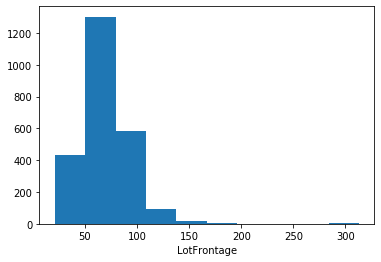

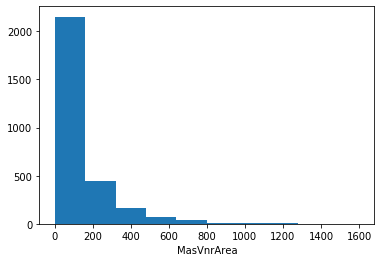

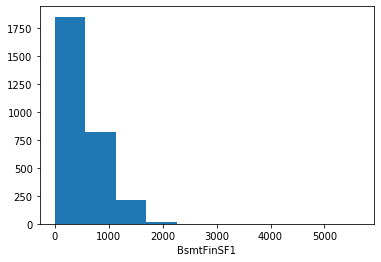

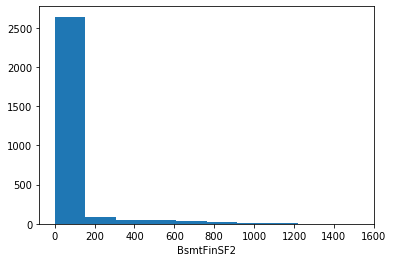

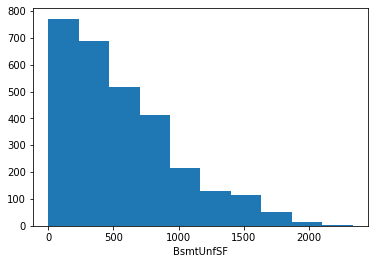

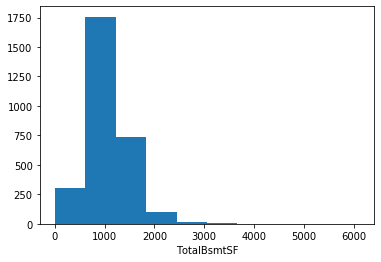

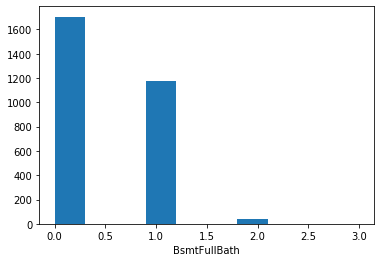

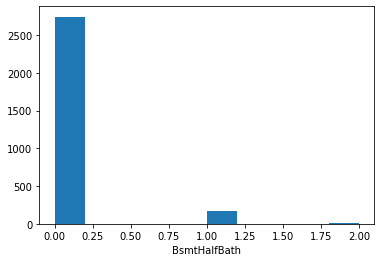

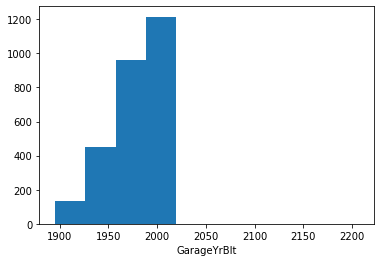

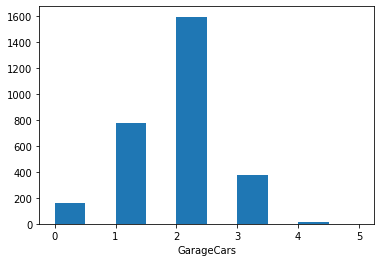

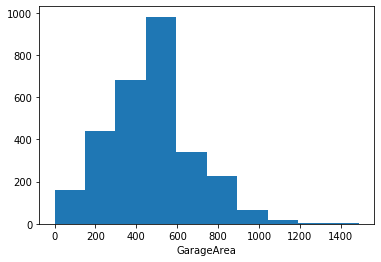

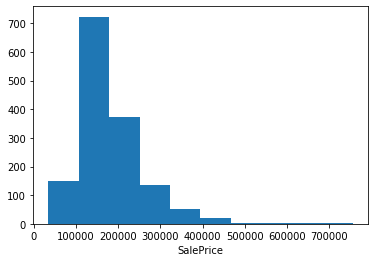

In [198]:
for var in num_missing_col:
    plt.hist(data[var])
    plt.xlabel(var)
    plt.show() # warning :It's because you're generating a histogram in a region where there is no data. There you should plot bar graph

In [199]:
data[num_missing_col].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,2433.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000,1460.000000
mean,69.305795,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572,180921.195890
std,23.344905,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815,79442.502883
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,34900.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000,129975.000000
50%,68.000000,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000,163000.000000
75%,80.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,214000.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,755000.000000


In [200]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0],inplace=True)
data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mode()[0],inplace=True)
data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mode()[0],inplace=True)
data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean(),inplace=True)
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean(),inplace=True)
data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0],inplace=True)
data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0],inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)
data['GarageCars'].fillna(data['GarageCars'].mode()[0],inplace=True)
data['GarageArea'].fillna(data['GarageArea'].mean(),inplace=True)

In [201]:
missing=data.isnull().sum()/data.shape[0]*100
missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
HeatingQC         0.000000
CentralAir        0.000000
E

In [202]:
year_feature = [feature for feature in num_cols if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [203]:
for var in year_feature:
    if(var!='YearBuilt'):
        data[var]=data[var]-data['YearBuilt']

In [204]:
data.drop(columns=['Id','YearBuilt'],inplace=True)

In [205]:
for i in data['YearRemodAdd']:
    if(i<0):
        print(i)

-1


In [206]:
data.drop(data[data['YearRemodAdd']<0].index,inplace=True) # as negative value of this doesn't make sense

In [207]:
for i in data['YrSold']:
    if(i<0):
        print(i)

-1


In [208]:
data.drop(data[data['YrSold']<0].index,inplace=True) # similar as above

In [209]:
data.drop(columns='TotalBsmtSF',inplace=True) # as it is total sum of BsmtFinSF1+BsmtUnfSF

# Handling Outliers and Skewness

In [236]:
skewed_data=[ 'LotFrontage', 'LotArea',
         'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','SalePrice']

In [237]:
for i in skewed_data:
    print(i+': {}'.format(data[i].skew()))

LotFrontage: -1.0236168474356195
LotArea: -0.5127827675274216
MasVnrArea: 0.5389112415581686
BsmtFinSF1: -0.6154665224717043
BsmtFinSF2: 2.4613017034744087
BsmtUnfSF: -2.159129808338892
1stFlrSF: 0.034114443672811225
2ndFlrSF: 0.3042136509058241
LowQualFinSF: 8.555990170453184
GrLivArea: -0.0039540778201764964
BsmtFullBath: 0.4274340622279664
BsmtHalfBath: 3.7869640539126044
FullBath: -0.2491076142335006
HalfBath: 0.5833924946231874
BedroomAbvGr: -0.9830489732988991
KitchenAbvGr: 3.519226262216677
TotRmsAbvGrd: 0.02021392014170989
Fireplaces: 0.23864998624632433
GarageCars: -1.2750149545101523
GarageArea: -3.5213501737957627
WoodDeckSF: 0.15812966168683026
OpenPorchSF: -0.04145918951860234
EnclosedPorch: 1.9598306783031447
3SsnPorch: 8.823516877598804
ScreenPorch: 2.9447493483512206
PoolArea: 14.995635667949928
MiscVal: 5.223209250128952
SalePrice: 0.12155711724222477


In [238]:
for i in skewed_data:
    data[i]=np.log(data[i]+1) # +1 to handle 0 values
    print(i+': {}'.format(data[i].skew()))

LotFrontage: -1.4055047341173785
LotArea: -0.9016671421407926
MasVnrArea: 0.4566813291535178
BsmtFinSF1: -0.7303008571477627
BsmtFinSF2: 2.3808404330430593
BsmtUnfSF: -2.794009904928383
1stFlrSF: -0.08849695777812029
2ndFlrSF: 0.2910226245984935
LowQualFinSF: 8.40866263281445
GrLivArea: -0.132406491644593
BsmtFullBath: 0.3825497594379944
BsmtHalfBath: 3.7497742964131913
FullBath: -0.6530446885204209
HalfBath: 0.5561967631108957
BedroomAbvGr: -2.0426453566207985
KitchenAbvGr: 2.24122814922781
TotRmsAbvGrd: -0.22430887610855746
Fireplaces: 0.09150121563955789
GarageCars: -1.9877031487562478
GarageArea: -3.8636702648286607
WoodDeckSF: 0.10512790006347833
OpenPorchSF: -0.17532035545003835
EnclosedPorch: 1.9018783061906208
3SsnPorch: 8.74004576566953
ScreenPorch: 2.920766519756524
PoolArea: 14.90677380875496
MiscVal: 5.090186142380607
SalePrice: -0.008913849368278506


In [239]:
newdata= pd.get_dummies(data,drop_first=True)

# Feature Scaling

In [240]:
cols=newdata.columns
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
mmc.fit(newdata)
newdata=pd.DataFrame(mmc.transform(newdata),columns=cols)
newdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_no Alley access,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.475114,0.424594,0.666667,0.500,0.000000,0.864618,0.666667,0.5,0.8,0.75,0.25,1.000000,0.892857,0.166667,0.0,0.827093,1.00,1.0,0.394409,0.949992,0.0,0.618794,0.605455,0.000000,0.772859,0.710382,0.748305,0.605455,0.666667,0.739608,0.000000,0.0,0.125656,0.666667,0.722019,0.939546,0.6,0.6,0.000000,0.805372,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.036765,0.609911,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.552420,0.450590,0.555556,0.875,0.000000,0.000000,0.333333,0.5,0.8,0.75,1.00,0.833333,0.911460,0.166667,0

# Train-test Splitting

In [241]:
X_train=newdata[newdata['SalePrice'].notnull()]
X_test=newdata[newdata['SalePrice'].isnull()]
y_train=X_train['SalePrice']

In [242]:
X_train=X_train.drop(columns='SalePrice')
X_test=X_test.drop(columns='SalePrice')

In [243]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [244]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[-1.83235235428983e+23]

In [245]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.8824092404011568]

In [246]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8904216014541003]

In [247]:
from sklearn.svm import SVR
svr_reg1=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[0.8050325718624842]

In [248]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,1.646667,2.306780,no Alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,0,Gable,VinylSd,VinylSd,BrkFace,1.837880,4,3,PConc,4.0,3.0,1.0,6.0,2.023008,1.0,0.0,1.794635,5,1,SBrkr,2.048136,2.047835,0.0,2.133555,0.526589,0.000000,0.741276,0.526589,0.869742,0.526589,4.0,1.162283,Typ,0.000000,0.0,Attchd,0.0,2.0,0.741276,1.988983,3.0,3.0,Y,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,None,0.0,2,5,WD,Normal,2.583824
1,20,RL,1.685370,2.319405,no Alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,0,Gable,MetalSd,MetalSd,None,0.000000,3,3,CBlock,4.0,3.0,4.0,5.0,2.065156,1.0,0.0,1.894991,5,1,SBrkr,2.096943,0.000000,0.0,2.096943,0.000000,0.526589,0.741276,0.000000,0.869742,0.526589,3.0,1.080418,Typ,0.526589,3.0,Attchd,0.0,2.0,0.741276,1.964788,3.0,3.0,Y,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.0,None,0.0,5,31,WD,Normal,2.573300
2,60,RL,1.655196,2.334879,no Alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,1,Gable,VinylSd,VinylSd,BrkFace,1.807264,4,3,PConc,4.0,3.0,2.0,6.0,1.972450,1.0,0.0,1.956616,5,1,SBrkr,2.057383,2.049631,0.0,2.138688,0.526589,0.000000,0.741276,0.526589,0.869742,0.526589,4.0,1.080418,Typ,0.526589,3.0,Attchd,0.0,2.0,0.741276,2.003076,3.0,3.0,Y,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.0,None,0.0,9,7,WD,Normal,2.589054
3,70,RL,1.631370,2.318892,no Alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,55,Gable,Wd Sdng,Wd Shng,None,0.000000,3,3,BrkTil,3.0,4.0,1.0,5.0,1.853152,1.0,0.0,1.986972,4,1,SBrkr,2.062933,2.032004,0.0,2.134038,0.526589,0.000000,0.526589,0.000000,0.869742,0.526589,4.0,1.124748,Typ,0.526589,4.0,Detchd,83.0,1.0,0.869742,2.010379,3.0,3.0,Y,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.0,None,0.0,2,91,WD,Abnorml,2.553297
4,60,RL,1.694266,2.357574,no Alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,0,Gable,VinylSd,VinylSd,BrkFace,1.925822,4,3,PConc,4.0,3.0,3.0,6.0,2.013056,1.0,0.0,1.973587,5,1,SBrkr,2.084931,2.074473,0.0,2.162835,0.526589,0.000000,0.741276,0.526589,0.959135,0.526589,4.0,1.194706,Typ,0.526589,3.0,Attchd,0.0,2.0,0.869742,2.045086,3.0,3.0,Y,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.0,None,0.0,12,8,WD,Normal,2.597433


# Feature Selection

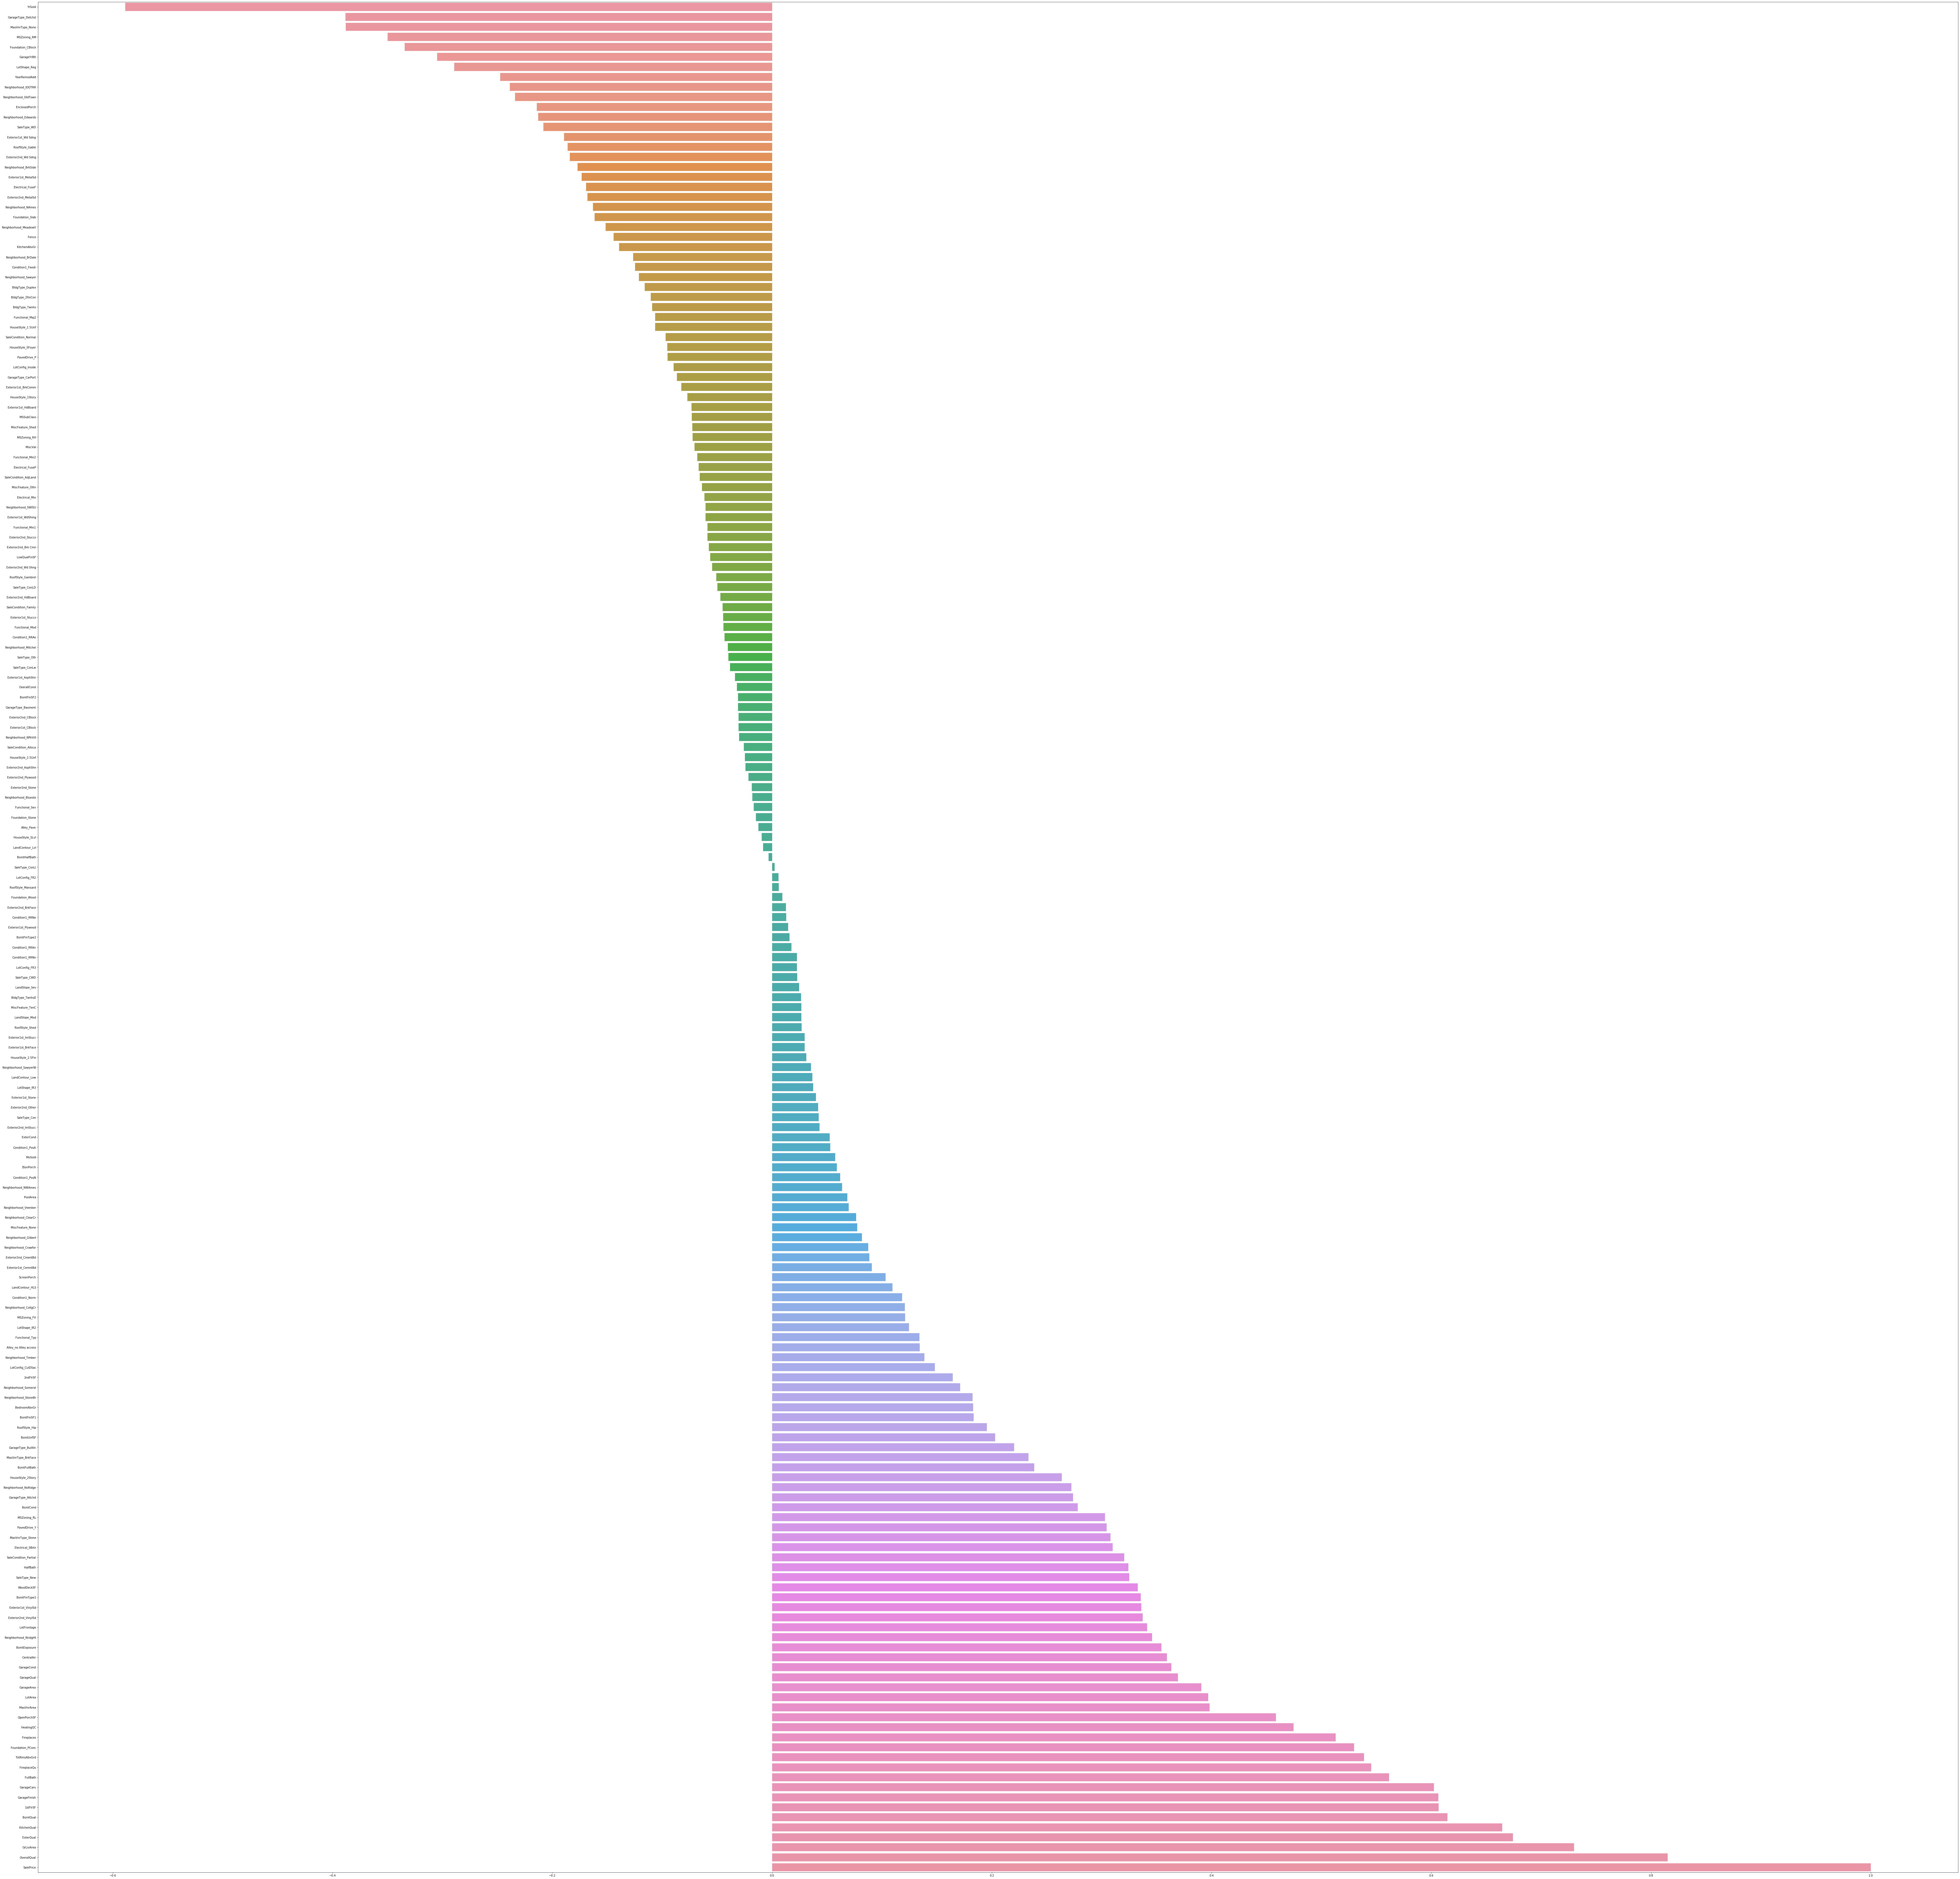

In [249]:
newdata= pd.get_dummies(data,drop_first=True)
plt.figure(figsize=(125,125))
corr_feat = pd.Series.sort_values(newdata.corrwith(newdata.SalePrice))
sns.barplot(x=corr_feat, y=corr_feat.index, orient='h') 

In [250]:
cols=[var for var in newdata.columns if abs(corr_feat[var])<0.07]
cols

['OverallCond',
 'ExterCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',


In [251]:
newdata.drop(columns=cols,inplace=True)

In [252]:
cols=newdata.columns
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
mmc.fit(newdata)
newdata=pd.DataFrame(mmc.transform(newdata),columns=cols)
newdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_no Alley access,LotShape_IR2,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Electrical_FuseF,Electrical_SBrkr,Functional_Maj2,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.475114,0.424594,0.666667,0.000000,0.864618,0.666667,0.8,0.75,0.25,1.000000,0.892857,0.827093,1.00,1.0,0.394409,0.949992,0.618794,0.605455,0.772859,0.710382,0.748305,0.605455,0.666667,0.739608,0.000000,0.0,0.125656,0.666667,0.722019,0.939546,0.6,0.6,0.000000,0.805372,0.000000,0.0,0.0,0.0,0.036765,0.609911,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.552420,0.450590,0.555556,0.000000,0.000000,0.333333,0.8,0.75,1.00,0.833333,0.911460,0.873344,1.00,1.0,0.543473,0.000000,0.513204,0.000000,0.772859,0.000000,0.748305,0.605455,0.333333,0.595790,0.549025,0.6,0.125656,0.666667,0.722019,0.928117,0.6,0.6,0.900796,0.000000,0.000000,0.0,0.0,0.0,0.227941,0.565627,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.235294,0.492150,0.482453,0.666667,0.007874,0.850215,0.666667,0.8,0.75,0.50,1.000000,0.870543,0.901745,1.00,1.0,0.422648,0.950825,0.633599,0.605455,0.772859,0.710382,0.748305,0.605455,0.666667,0.595790,0.549025,0.6,0.125656,0.666667,0.722019,0.946203,0.6,0.6,0.000000,0.768888,0.000000,0.0,0.0,0.0,0.051471,0.631921,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.294118,0.444561,0.449532,0.666667,0.433071,0.000000,0.333333,0.6,1.00,0.25,0.833333,0.817891,0.915736,0.75,1.0,0.439600,0.942648,0.620188,0.605455,0.549025,0.000000,0.748305,0.605455,0.666667,0.673668,0.549025,0.8,0.486703,0.333333,0.847147,0.949653,0.6,0.6,0.000000,0.750148,0.912552,0.0,0.0,0.0,0.669118,0.481453,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [253]:
X_train=newdata[newdata['SalePrice'].notnull()]
X_test=newdata[newdata['SalePrice'].isnull()]
y_train=X_train['SalePrice']

In [254]:
X_train=X_train.drop(columns='SalePrice')
X_test=X_test.drop(columns='SalePrice')

In [255]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [256]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8877484583567704]

In [257]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.8902201786617147]

In [258]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8917494620953647]

In [259]:
from sklearn.svm import SVR
svr_reg1=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[0.8136640450338785]

In [260]:
svr_reg= SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.00001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg)

[0.8906956459385652]

In [261]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_reg1, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

0.8783893759478304